# Test Cvdp Time Handling

Currently this workbook only shows that it produces a useable array of time objects. There is no limit testing etc.

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime

First load up the cvdp and figure out which indexes we want to calculate

In [2]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '001', decode_times=False)

Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.001.cvdp_data.850-2005.nc']


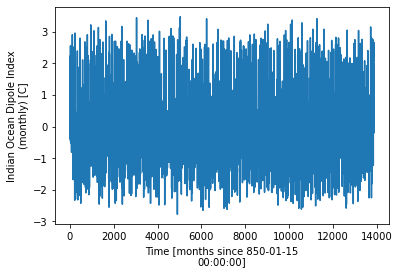

In [3]:
iodCvdp = cvdp.indian_ocean_dipole
del cvdp

#just plot something for sanity
iodCvdp.plot()

In [4]:
iodCvdp

<xarray.DataArray 'indian_ocean_dipole' (time: 13872)>
dask.array<open_dataset-2180c1561e5c2bd95fa3654e9afbbdddindian_ocean_dipole, shape=(13872,), dtype=float32, chunksize=(13872,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.387e+04 1.387e+04 1.387e+04
Attributes:
    comment_cvdp:  area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)
    units:         C
    long_name:     Indian Ocean Dipole Index (monthly)

In [5]:
iodCvdp.time.units

'months since 850-01-15 00:00:00'

In [6]:
len(iodCvdp.time)

13872

In [7]:
iodCvdp = cvdpTime.decodeTime(iodCvdp)
iodCvdp

<xarray.DataArray 'indian_ocean_dipole' (time: 13872)>
dask.array<open_dataset-2180c1561e5c2bd95fa3654e9afbbdddindian_ocean_dipole, shape=(13872,), dtype=float32, chunksize=(13872,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:00:00
Attributes:
    comment_cvdp:  area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)
    units:         C
    long_name:     Indian Ocean Dipole Index (monthly)

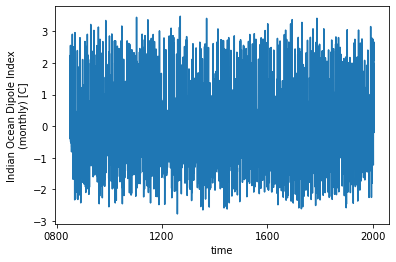

In [8]:
iodCvdp.plot.line()

In [20]:
iodCvdp.time.values[0]
# should be jan 850

cftime.DatetimeNoLeap(850, 1, 31, 0, 0, 0, 0)

In [16]:
iodCvdp.time.values[-1]
# should be dec 2005

cftime.DatetimeNoLeap(2005, 12, 31, 0, 0, 0, 0)